# 1.Introduction
In this notebook, we will dive deep into the intriguing world of crab farming. It is a popular and economically rewarding activity, especially in coastal regions, with lower labor and production costs, quick growth, and a large market for consumption. But, to achieve an optimum balance between cost and profit, one crucial element that farmers need to estimate accurately is the age of the crab. Precise age determination aids in knowing the right time to harvest the crabs, ensuring the best utilization of resources.

## 1.1. Problem Summary
The main problem we are addressing is predicting the age of the crab based on its physical attributes. This regression problem, given its real-world implications and the need for precise results, calls for a comprehensive exploratory data analysis (EDA), adept feature engineering, and robust regression modeling.

## 1.2. Dataset
The dataset we have contains a total of 74051 observations across several physical characteristics of crabs. Each observation is an individual crab with features like:

- Sex
- Length (in feet)
- Diameter (in feet)
- Height (in feet)
- Weight (in ounces)
- Shucked Weight (Weight without the shell, in ounces)
- Viscera Weight (Weight of the abdominal organs, in ounces)
- Shell Weight (in ounces)
- Age (in months)
  
The data seems to be clean without any missing or mismatched values. A preliminary overview shows a diverse set of values across different features, hinting at potential patterns and correlations that could be instrumental in our modeling.

## 1.3.Feature Characteristics
A brief overview of the feature characteristics is as follows:

- Sex: The dataset is almost evenly split across the three categories: Male (37%), Female (32%), and Indeterminate (31%).
- Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, and Shell Weight: These features showcase a range of values, with different means, standard deviations, and quantiles. A more in-depth analysis will help in understanding their distributions and potential impact on the age of the crab.
- Age: The age of the crab ranges from 1 month to 29 months, with a mean of approximately 9.95 months. The data skews towards younger crabs, with a significant number of crabs aged between 6.60 to 12.20 months.

## 1.4.Methodology
The methodology for this analysis will consist of the following stages:

- Exploratory Data Analysis (EDA): The aim here is to understand the distribution of data, correlations between different features, and detect any potential outliers or anomalies.

- Feature Engineering: This stage involves generating new features that might help improve the model's accuracy. These can be combinations of existing features or transformations.

- Model Building: We will try out various regression models like Linear Regression, Decision Trees, Random Forests, SVM, etc., to predict the age of the crab.

- Model Evaluation: Evaluate the model using appropriate metrics and error analysis to see how well our model is performing.

- Model Tuning: This includes tuning hyperparameters for better performance and applying techniques like cross-validation to avoid overfitting.

The above process will be iteratively performed until we arrive at a satisfactory model for predicting the age of the crab.

# 2. Procesamiento de datos
## 2.1. Importación de datos y análisis básico

In [1]:
import pandas as pd

X_train = pd.read_csv('input/train.csv')
X_test = pd.read_csv('input/test.csv')

id_test = X_test['id']

In [2]:
# Shape of the data
print('Shape of the training data: ', X_train.shape)
print('Shape of the testing data: ', X_test.shape)

Shape of the training data:  (74051, 10)
Shape of the testing data:  (49368, 9)


In [3]:
X_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [4]:
X_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


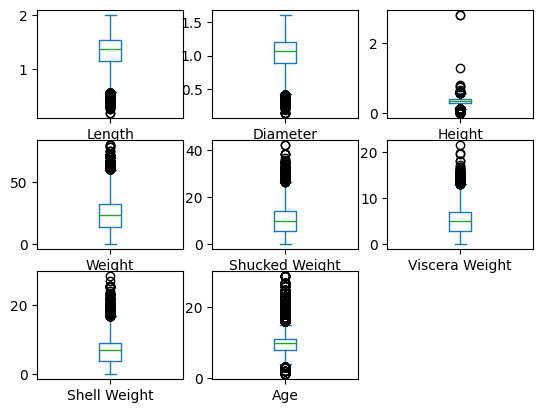

In [6]:
import matplotlib.pyplot as plt

# Individuals boxplot for each feature of the training data without id column
X_train.iloc[:,1:].plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (8, 8)
plt.show()

We can see a lot of outliers in each feature.

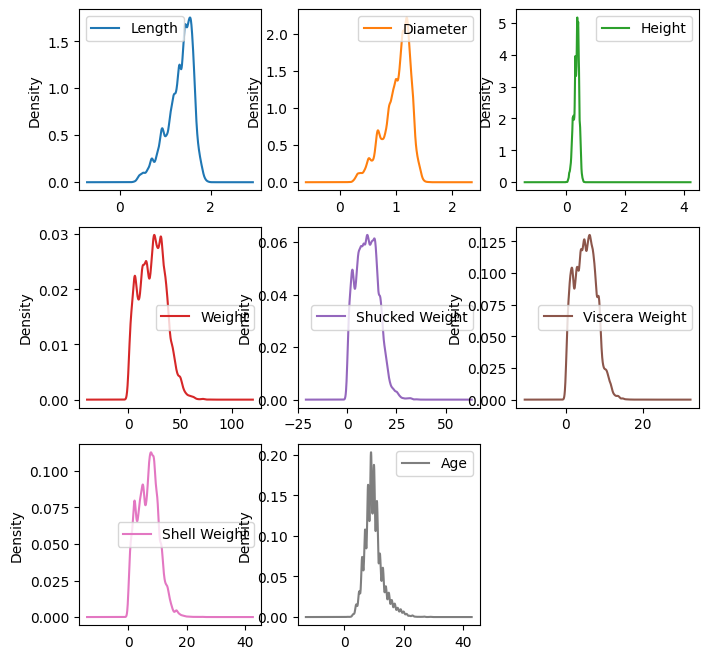

In [7]:
# Density function for each feature of the training data without id column
X_train.iloc[:,1:].plot(kind='density', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (12, 12)
plt.show()

In [8]:
# One Hot enconding of sex feature of X_train
X_train_corr = pd.concat([X_train, pd.get_dummies(X_train['Sex'], prefix='Sex')], axis=1)
X_train_corr.drop('Sex', axis=1, inplace=True)

In [9]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Sex'], prefix='Sex')], axis=1)
X_test.drop('Sex', axis=1, inplace=True)

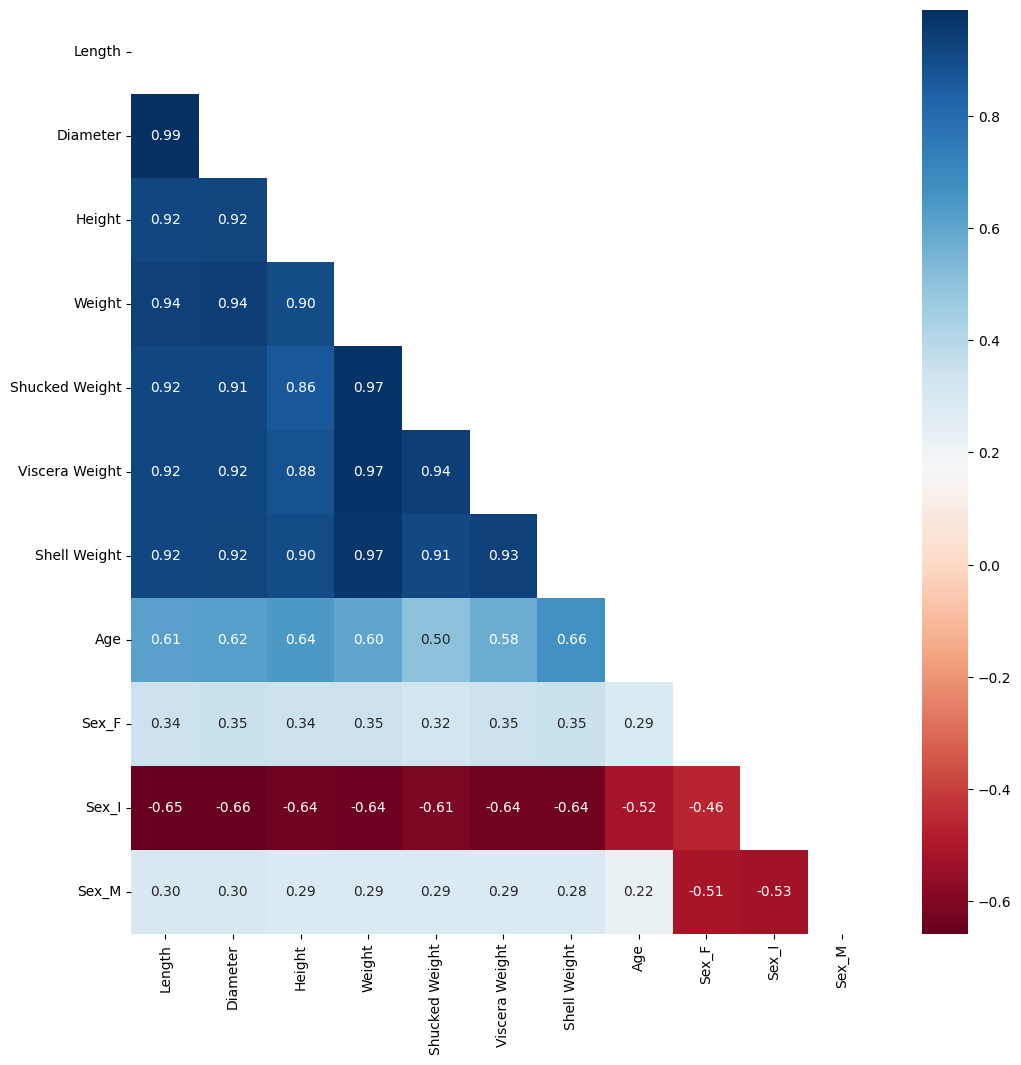

In [10]:
# Correlation matrix for the training data without id column with seaborn only inferior triangle
import seaborn as sns
import numpy as np

corr = X_train_corr.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

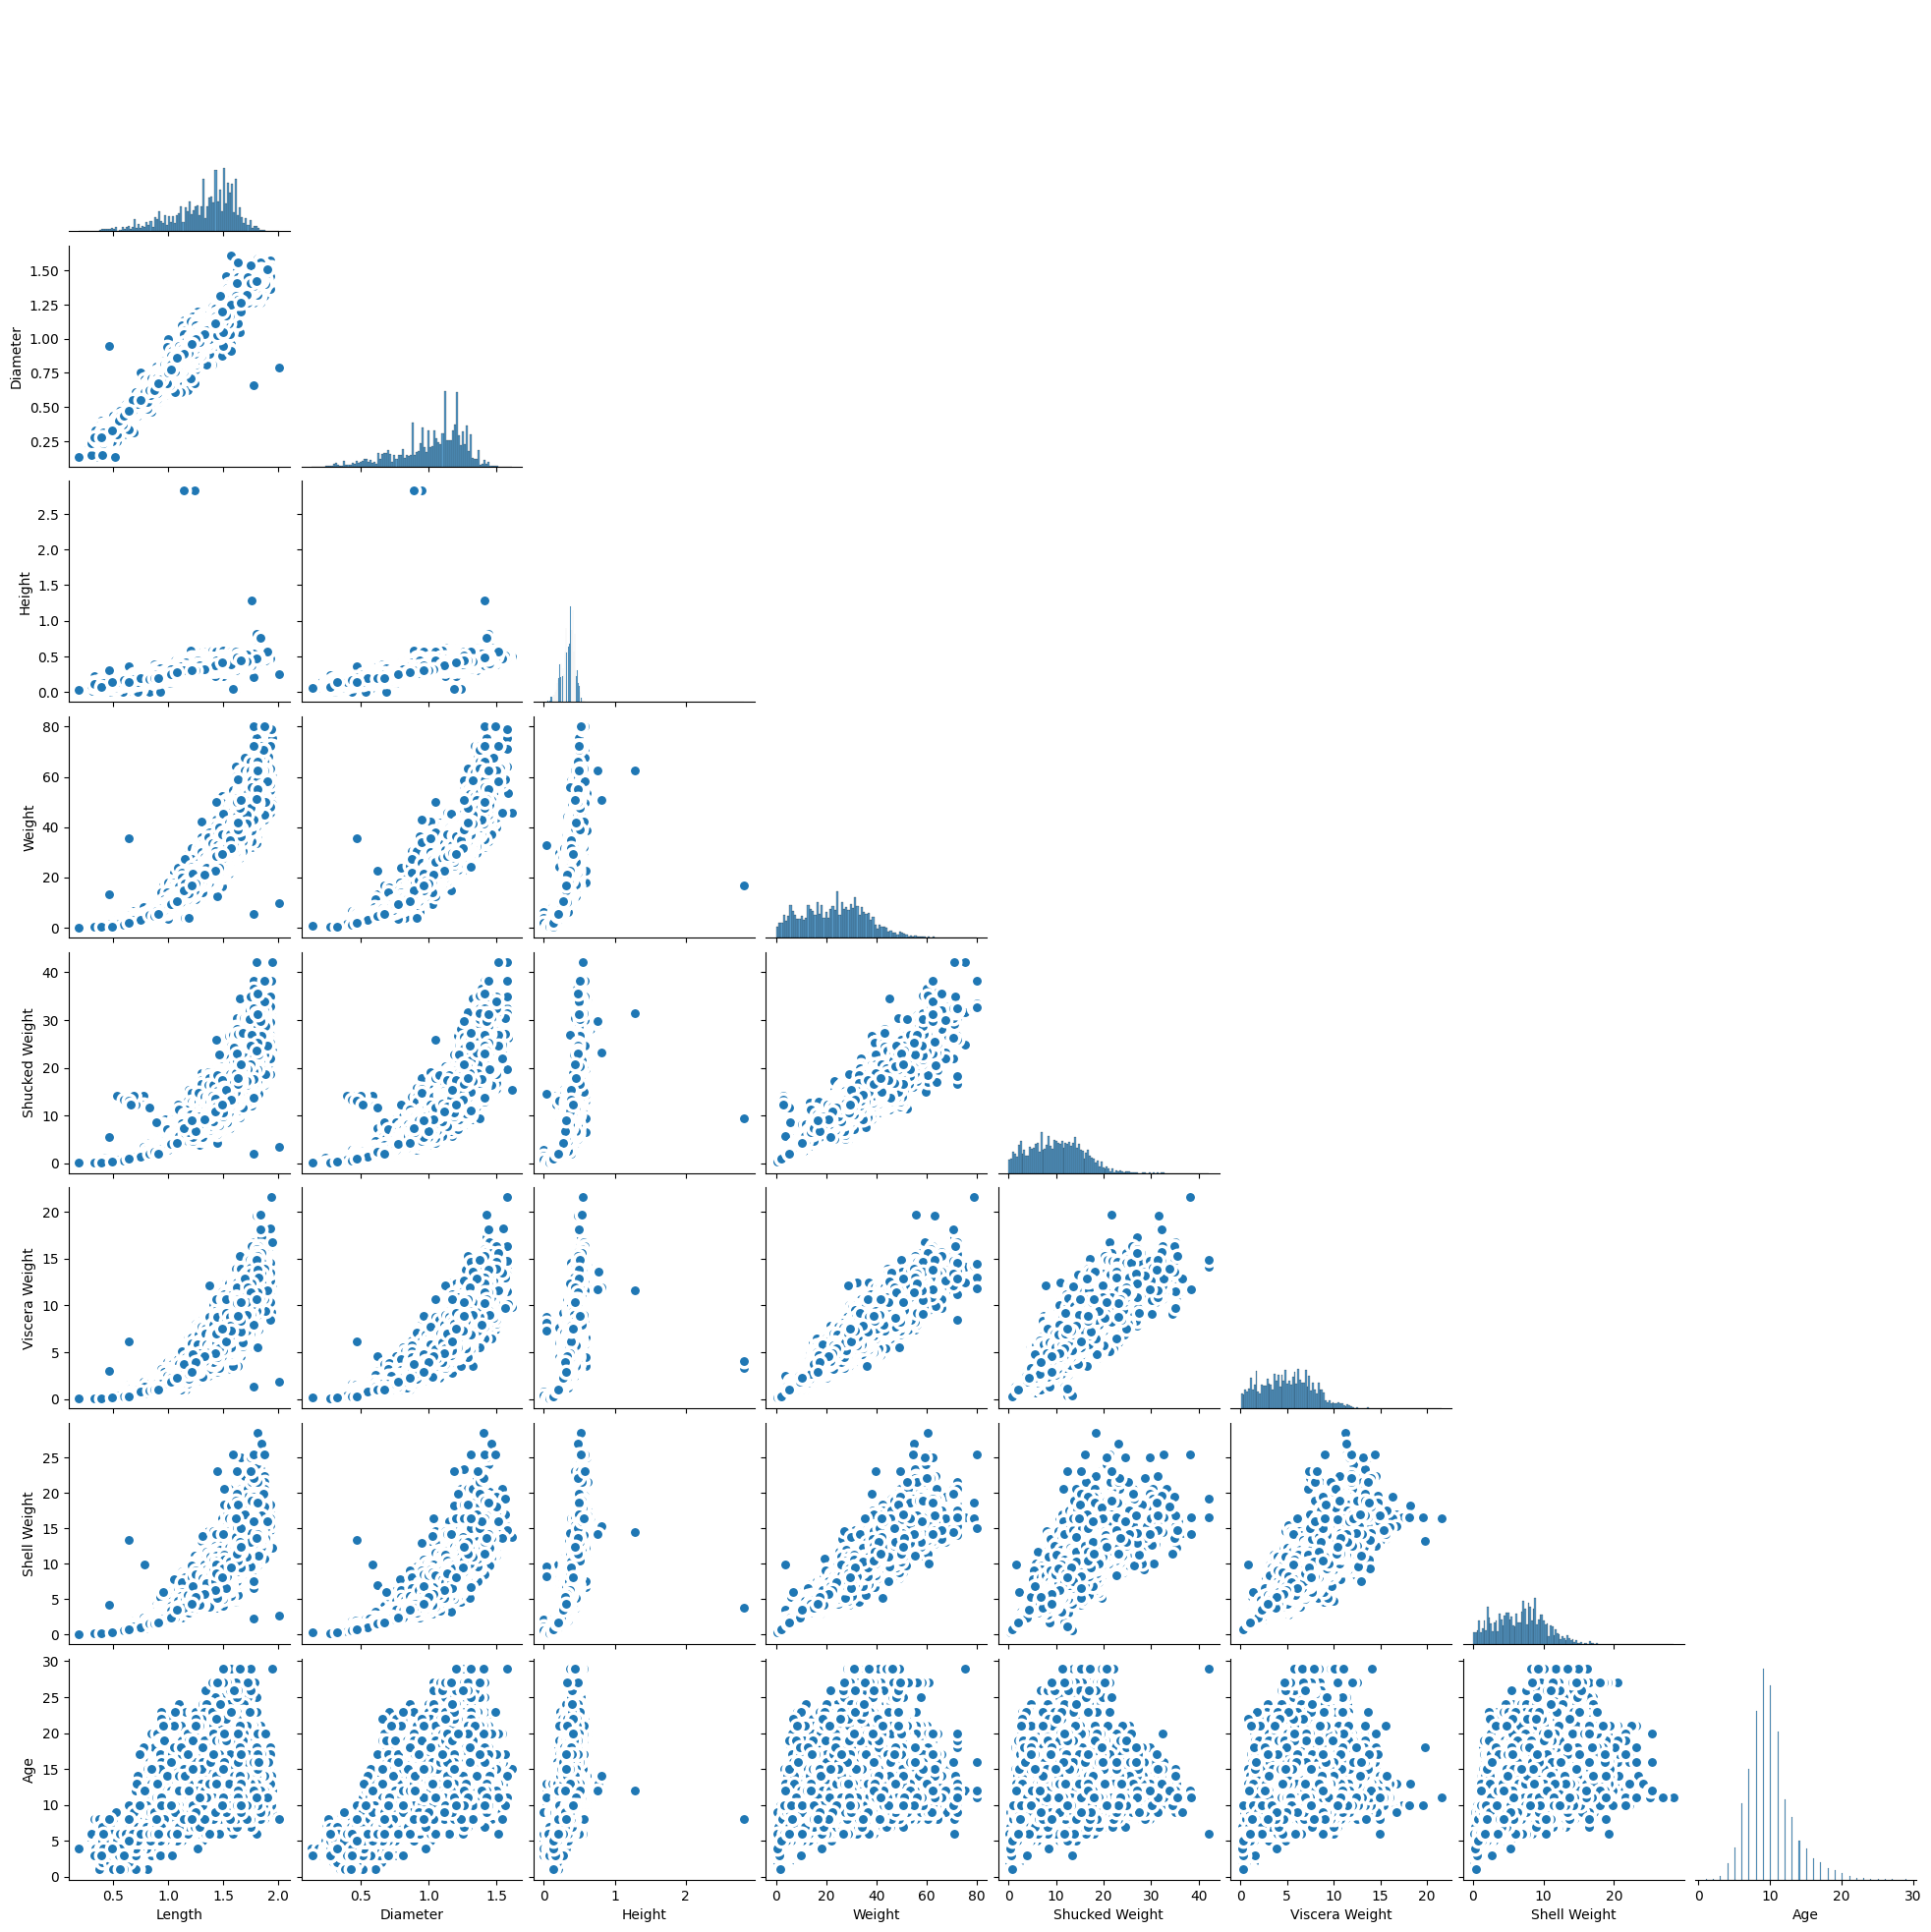

In [11]:
import seaborn as sns

# matrix of scatter and histograms for each feature of the training data without id column
sns.pairplot(data=X_train.iloc[:,1:], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()

## 2.1. Outliers

We are going to get rid of outliers for modelling

In [12]:
X_train_corr.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,False,True,False
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,False,True,False
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,False,False,True
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,True,False,False
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,False,True,False


In [13]:
# Loop over all feature to drop observations over and below 3 standard deviations
for col in X_train_corr.columns[1:]:
    X_train_corr = X_train_corr[(X_train_corr[col] >= X_train_corr[col].mean() - 3 * X_train_corr[col].std())]
    X_train_corr = X_train_corr[(X_train_corr[col] <= X_train_corr[col].mean() + 3 * X_train_corr[col].std())]

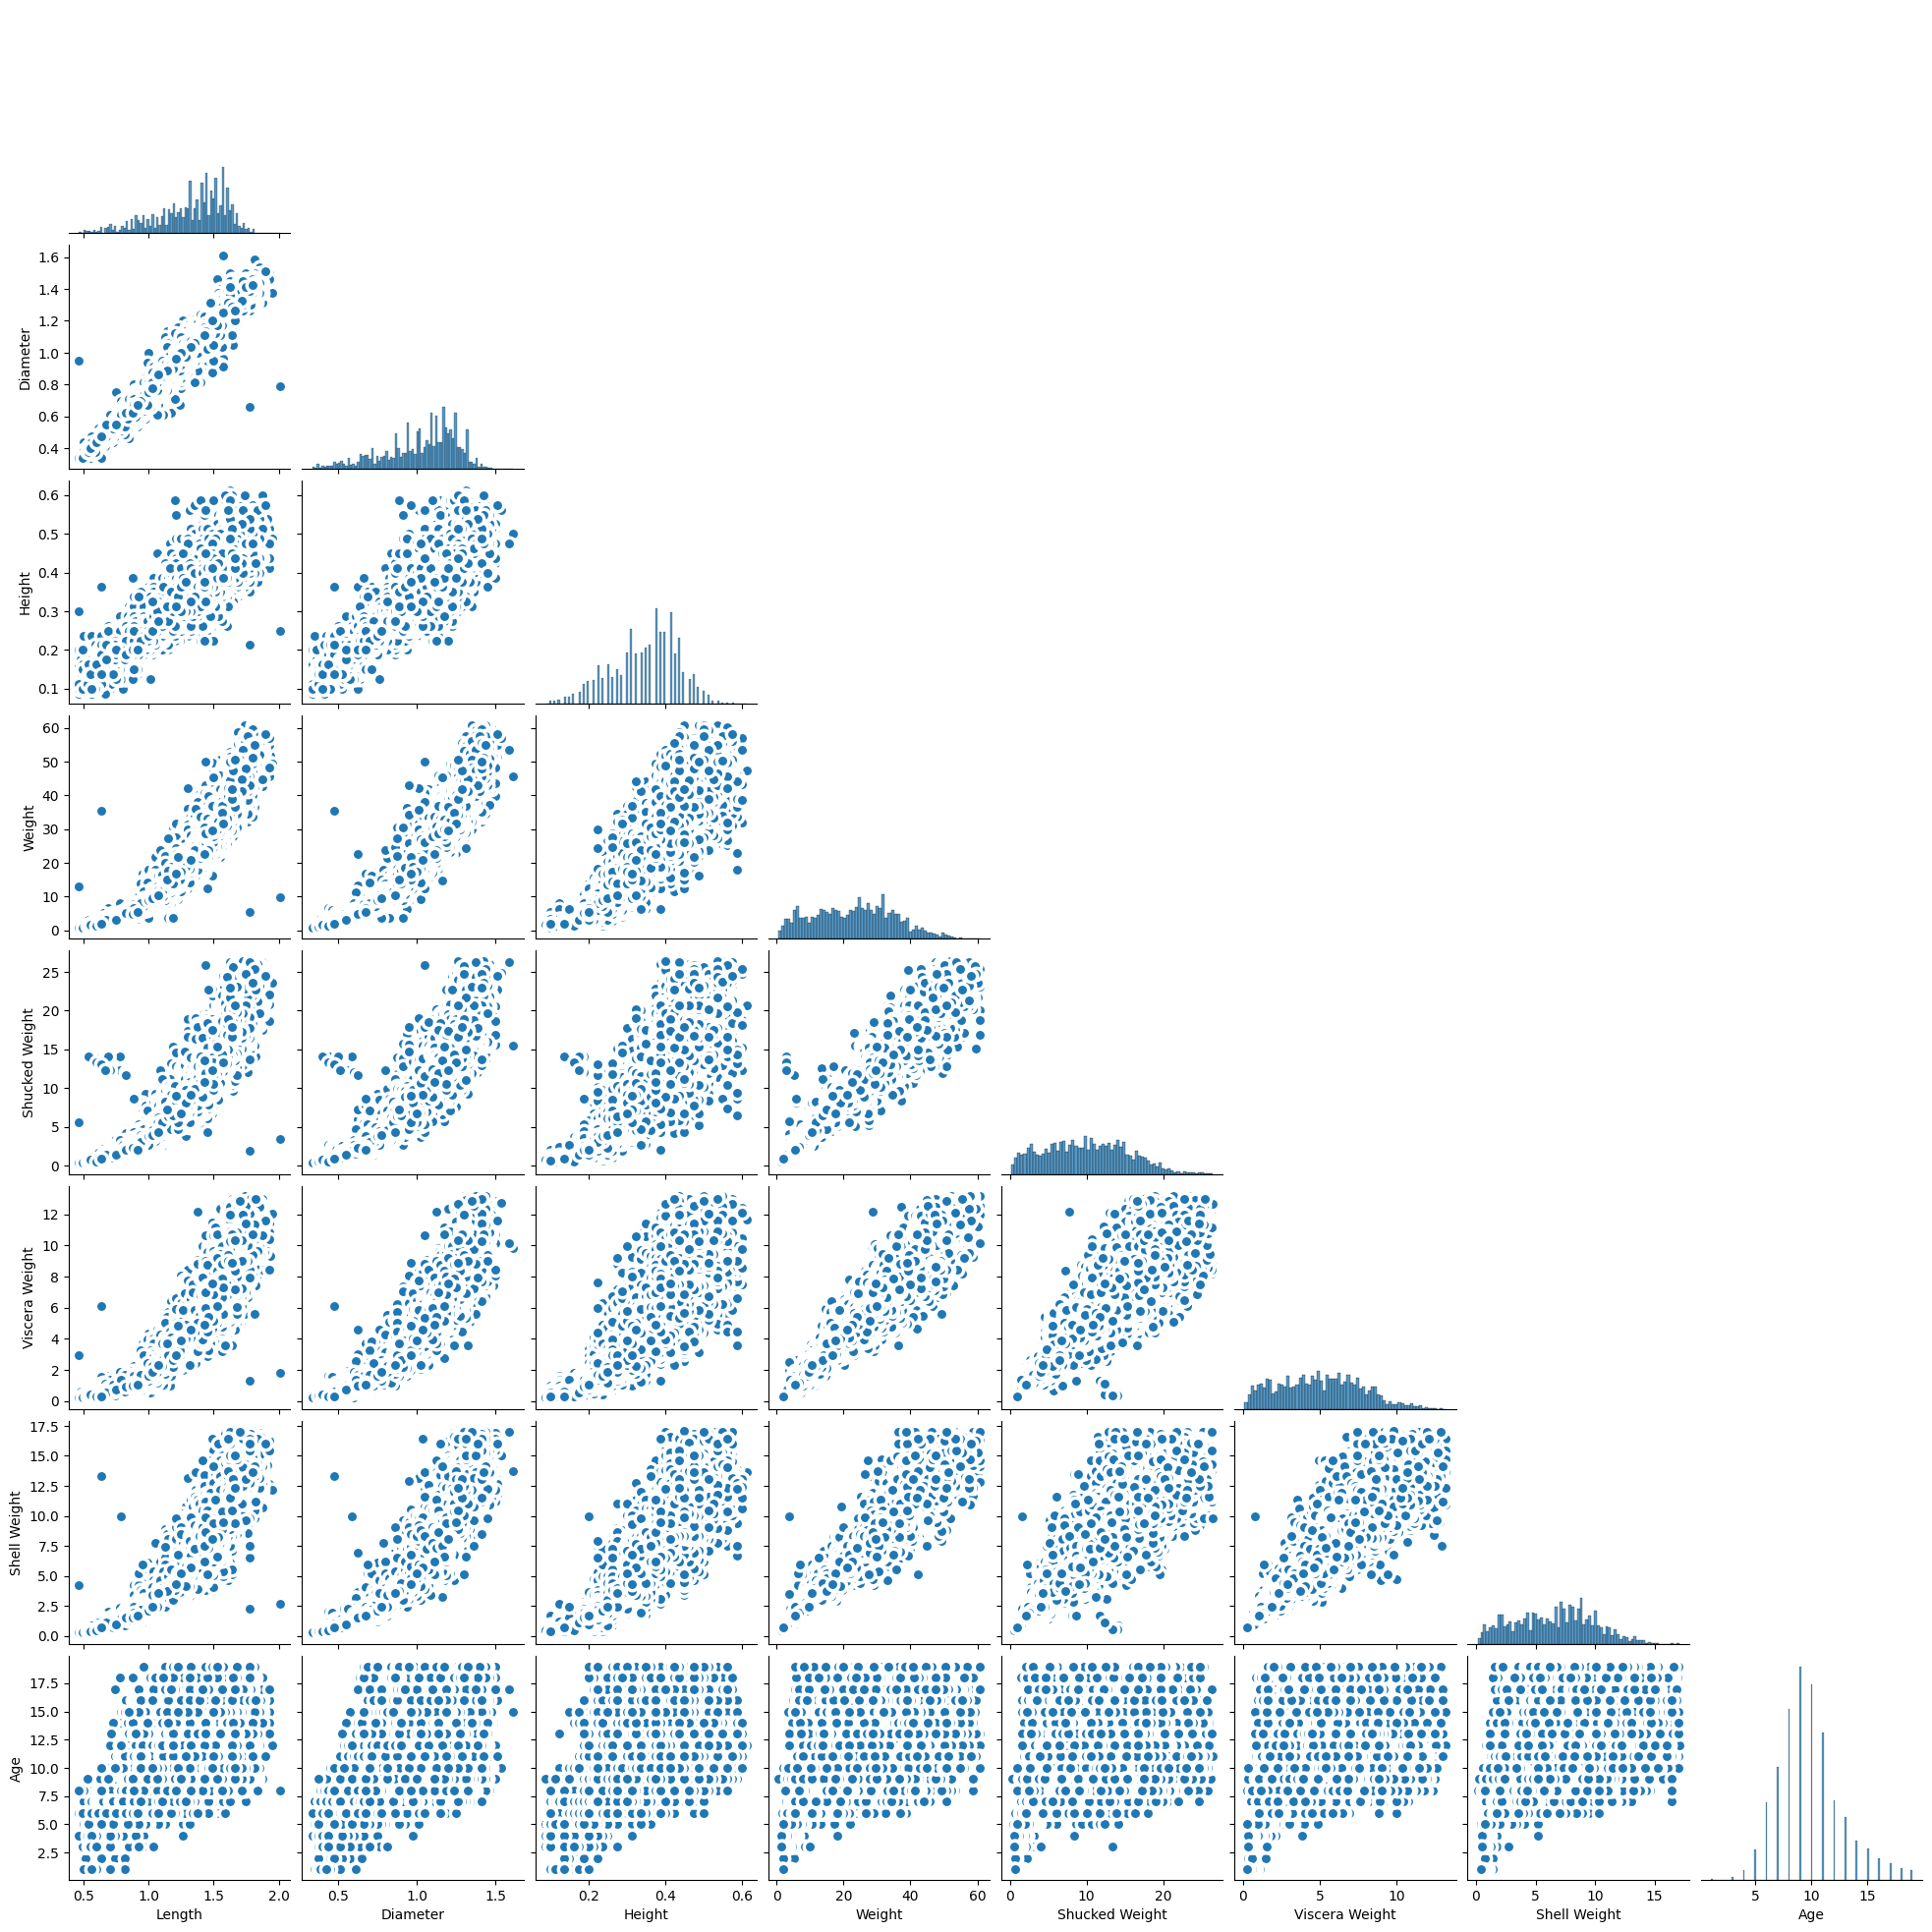

In [14]:
import seaborn as sns

# matrix of scatter and histograms for each feature of the training data without id column
sns.pairplot(data=X_train_corr.iloc[:,1:-3], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()

Now scatter plots and histograms look much better.

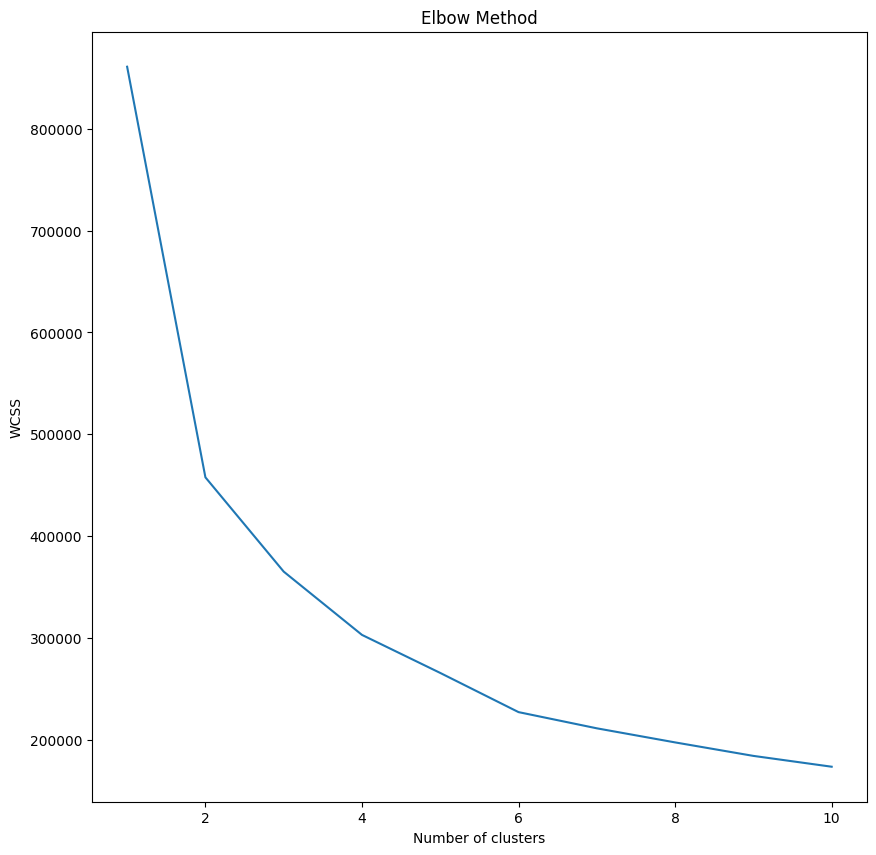

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train_corr)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
X_train = X_train_corr

## 2.2. Missing values

In [17]:
# Table with the number of missing values for each feature
X_train.isnull().sum()

id                0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

No missing values found.

# Feature engineering

Here are some characteristics and behaviors of crabs that might be relevant for feature engineering:

- Growth and Moulting: Crabs grow through a process called moulting, which is when they shed their previous shell and grow a new one. The frequency and timing of moulting can be related to the crab's age. For example, younger crabs moult more frequently than adult ones. If you have data on moult frequency or shell weight ratio (which might indicate when the last moult occurred), this could be useful.

- Sex and Reproduction: Growth patterns can vary between male and female crabs, especially in relation to reproduction. For example, females may stop growing when they start reproducing, whereas males may continue to grow for longer. Therefore, the sex of the crab could be a significant factor in predicting its age.

We are going to create the following type o features:

## Dimension ratios

In [18]:
X_train['Relation_DL'] = X_train['Diameter'] / X_train['Length'] 
X_train['Relation_HL'] = X_train['Height'] / X_train['Length'] 
X_train['Relation_HD'] = X_train['Height'] / X_train['Diameter']

# The same for the test data
X_test['Relation_DL'] = X_test['Diameter'] / X_test['Length']
X_test['Relation_HL'] = X_test['Height'] / X_test['Length']
X_test['Relation_HD'] = X_test['Height'] / X_test['Diameter']

# Density

In [19]:
# importar el numero pi
import numpy as np

# We suppose the crab as a elllipsoid
X_train['Volume'] = (4/3)*np.pi*(X_train['Diameter'] * X_train['Length'] * X_train['Height'])/16
X_test['Volume'] = (4/3)*np.pi*(X_test['Diameter'] * X_test['Length'] * X_test['Height'])/16

X_train['Density'] = X_train['Weight'] / X_train['Volume']
X_test['Density'] = X_test['Weight'] / X_test['Volume']


# Weight proportions

In [20]:
X_train['Ratio_ShuWei'] = X_train['Shucked Weight'] / X_train['Weight']
X_train['Ratio_VisWei'] = X_train['Viscera Weight'] / X_train['Weight']
X_train['Ratio_SheWei'] = X_train['Shell Weight'] / X_train['Weight']

X_test['Ratio_ShuWei'] = X_test['Shucked Weight'] / X_test['Weight']
X_test['Ratio_VisWei'] = X_test['Viscera Weight'] / X_test['Weight']
X_test['Ratio_SheWei'] = X_test['Shell Weight'] / X_test['Weight']

In [21]:
X_train.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,False,True,False,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,False,True,False,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,False,False,True,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
3,3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,True,False,False,0.830882,0.294118,0.353982,0.314323,161.173615,0.401791,0.216970,0.296027
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,False,True,False,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630


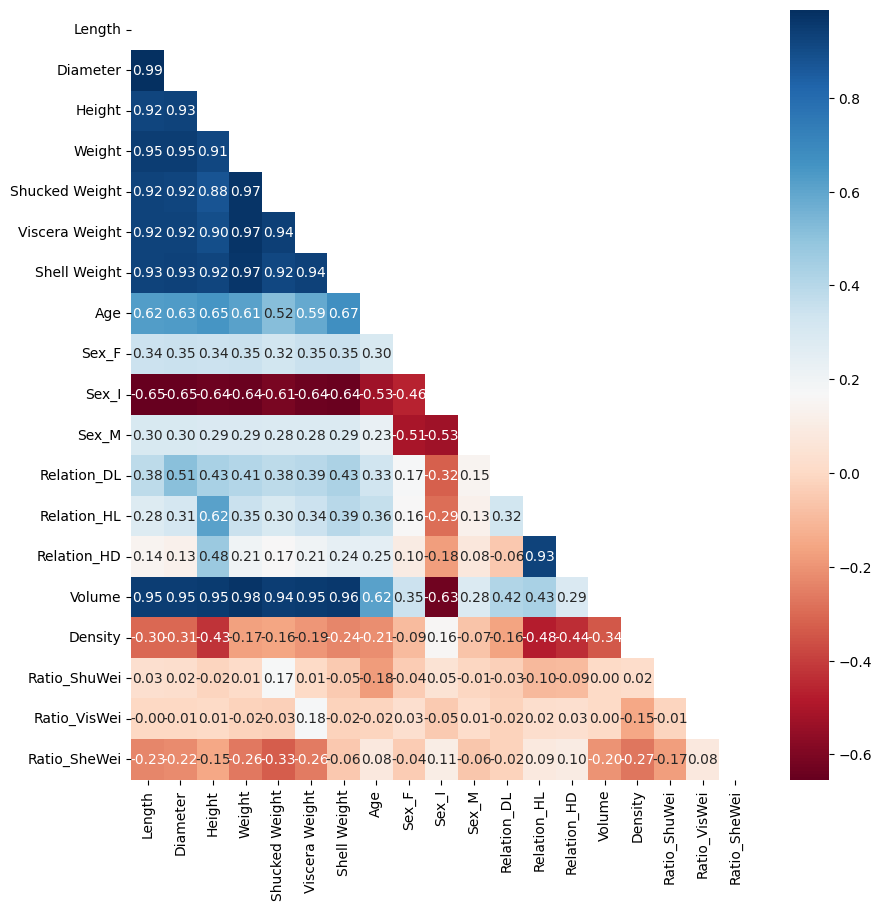

In [22]:
corr = X_train_corr.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

# Modelling

In [23]:
X_train_Modelling = X_train.drop(['id', 'Age'], axis=1)

In [24]:
y_train =X_train['Age']

In [25]:
X_test = X_test.drop(['id'], axis=1)

In [26]:
X_train_Modelling.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,False,True,False,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,False,True,False,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,False,False,True,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,True,False,False,0.830882,0.294118,0.353982,0.314323,161.173615,0.401791,0.216970,0.296027
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,False,True,False,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630


In [27]:
# Bollean features to int
X_train_Modelling['Sex_F'] = X_train_Modelling['Sex_F'].astype(int)
X_train_Modelling['Sex_M'] = X_train_Modelling['Sex_M'].astype(int)
X_train_Modelling['Sex_I'] = X_train_Modelling['Sex_I'].astype(int)

# The same for the test data   
X_test['Sex_F'] = X_test['Sex_F'].astype(int)
X_test['Sex_M'] = X_test['Sex_M'].astype(int)
X_test['Sex_I'] = X_test['Sex_I'].astype(int)

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

"""    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Neural Network", MLPRegressor(max_iter=1000)),
    ("SVR", SVR()),
    ("Knn", KNeighborsRegressor()),
    ("XGB", XGBRegressor(eval_metric='mae')),"""

models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Knn", KNeighborsRegressor()),
    ("XGB", XGBRegressor(eval_metric='mae')),
    ("LGBM", LGBMRegressor())
]

cv = KFold(n_splits=5, shuffle=True, random_state=1)  # KFold cross-validator

model_scores = {}

for name, model in models:
    scores = -1 * cross_val_score(model, X_train_Modelling, y_train, cv = cv, scoring='neg_mean_absolute_error')
    model_scores[name] = scores

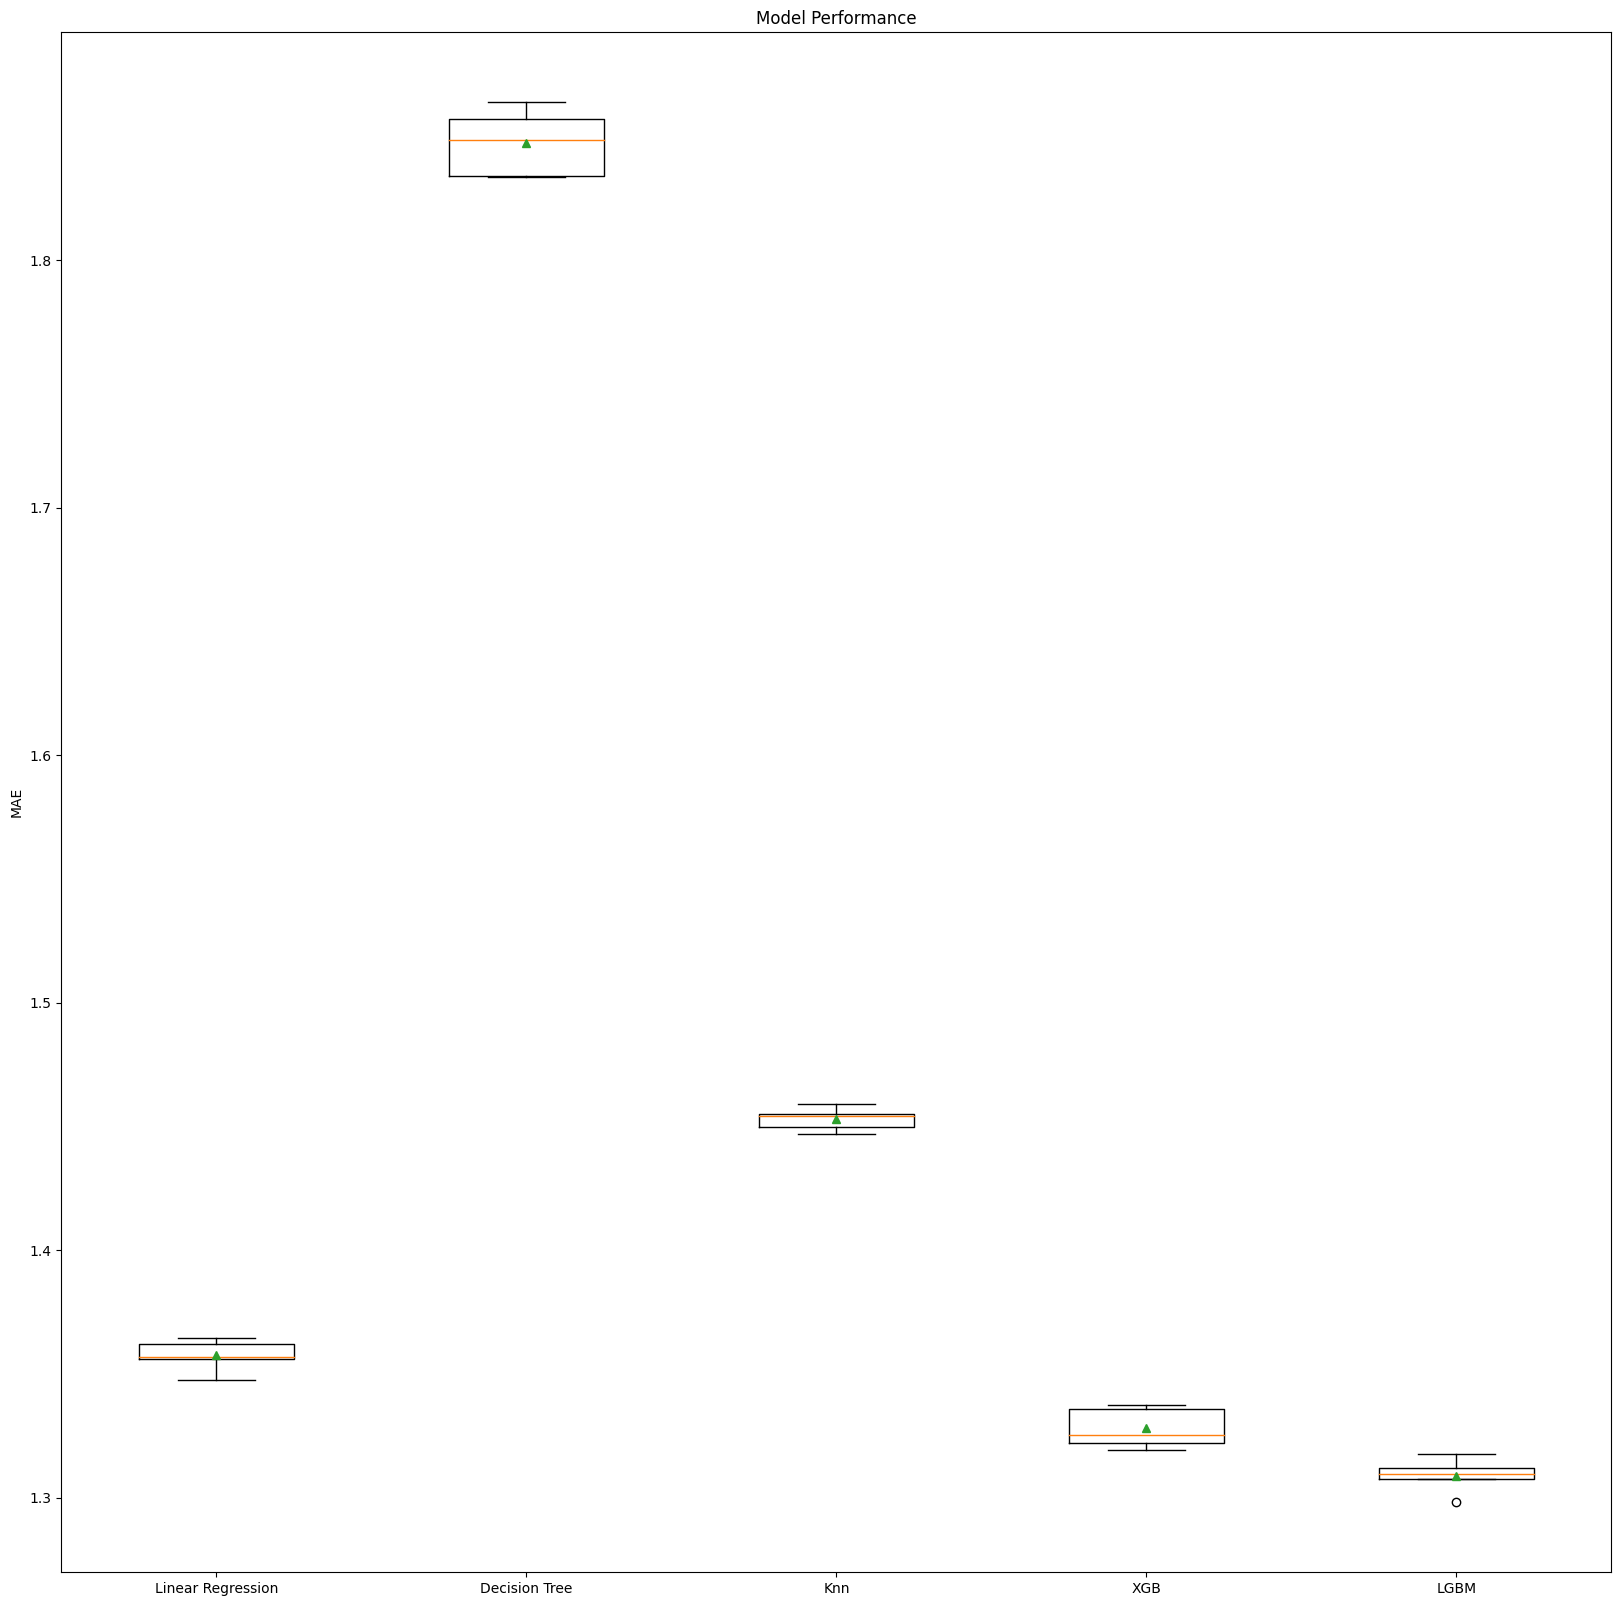

In [29]:
plt.boxplot(model_scores.values(), labels=model_scores.keys(), showmeans=True)
plt.ylabel("MAE")
plt.title("Model Performance")
plt.show()

# Lasso

In [64]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento y luego transformarlos
X_train_scaled = scaler.fit_transform(X_train_Modelling)

# Definir el modelo
model_Lasso_0 = Lasso()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

# Configurar la búsqueda de hiperparámetros con cross-validation
grid = GridSearchCV(model_Lasso_0, param_grid, scoring='neg_mean_absolute_error', cv=5)

# Realizar la búsqueda de hiperparámetros
grid.fit(X_train_scaled, y_train)

# Mostrar el mejor parámetro encontrado
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

# Obtén el mejor modelo
model_Lasso = grid.best_estimator_


Best: -1.446574 using {'alpha': 0.1}


# KNN

In [31]:
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

# Espacio de búsqueda de hiperparámetros
space ={
    'n_neighbors': hp.choice('n_neighbors', range(1, 30)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2]),
}

# Función objetivo para hyperopt
def objective(space):
    model_Knn_0 = KNeighborsRegressor(n_neighbors = space['n_neighbors'],
                                weights = space['weights'],
                                p = space['p'])

    mae = cross_val_score(model_Knn_0, X_train_scaled, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()

    return {'loss': mae, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

# Obtén los mejores hiperparámetros
best_params = space_eval(space, best)

# Crea un modelo con los mejores hiperparámetros
model_knn= KNeighborsRegressor(n_neighbors=best_params['n_neighbors'],
                            weights=best_params['weights'],
                            p=best_params['p'])

# Entrena el modelo
model_knn.fit(X_train_scaled, y_train)

100%|██████████| 50/50 [15:28<00:00, 18.56s/trial, best loss: 1.3486324872259015]


KNeighborsRegressor(n_neighbors=29, p=1, weights='distance')

# LightGBM

In [36]:
import lightgbm as lgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

space ={
    'max_depth': hp.quniform('max_depth', 2, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.015, 0.07),
    'num_leaves': hp.quniform('num_leaves', 5, 100, 1),
    'feature_fraction': hp.uniform('feature_fraction', 0.01, 1.0),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.01, 1.0),
    'n_estimators': hp.quniform('n_estimators', 20, 300, 5),
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 2, 100, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0)
}

# Función objetivo para hyperopt
def objective(space):
    model_LGBM = lgb.LGBMRegressor(max_depth = int(space['max_depth']),
                             learning_rate = space['learning_rate'],
                             num_leaves = int(space['num_leaves']),
                             n_estimators = int(space['n_estimators']),
                             feature_fraction = space['feature_fraction'],
                             bagging_fraction = space['bagging_fraction'],
                             min_data_in_leaf = int(space['min_data_in_leaf']),
                             reg_alpha = space['reg_alpha'],
                             reg_lambda = space['reg_lambda'])
    
                             
    mae = cross_val_score(model_LGBM, X_train_Modelling, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()

    return {'loss': mae, 'status': STATUS_OK}


# Run the algorithm
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=200,
            trials=trials)

print("Best: ", best)


[LightGBM] [Warning] feature_fraction is set=0.41814062182436434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41814062182436434
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_fraction is set=0.5962228640280207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5962228640280207
[LightGBM] [Warning] feature_fraction is set=0.41814062182436434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41814062182436434
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] bagging_fraction is set=0.5962228640280207, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5962228640280207
[LightGBM] [Warning] feature_fraction is set=0.41814062182436434, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.418140621824

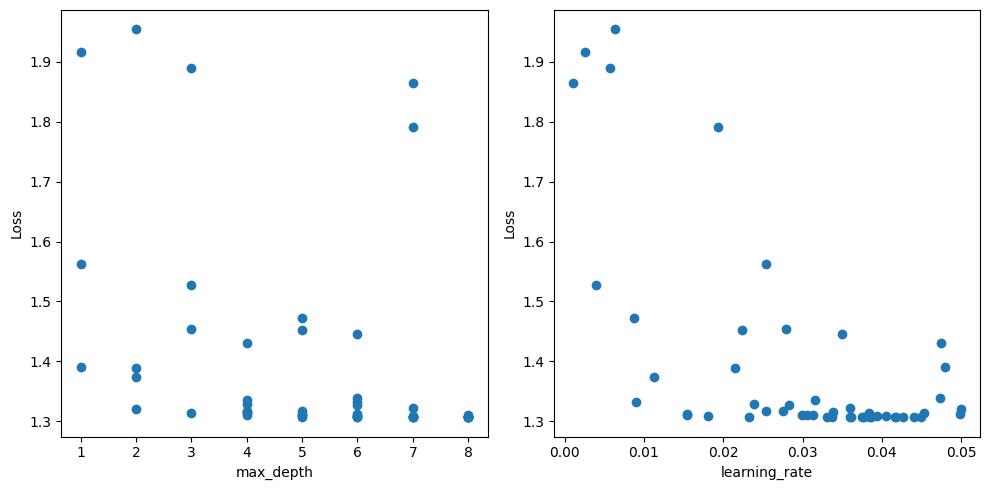

In [38]:
# Extrae los resultados
max_depth = [x['misc']['vals']['max_depth'] for x in trials.trials]
learning_rate = [x['misc']['vals']['learning_rate'] for x in trials.trials]
losses = [x['result']['loss'] for x in trials.trials]

# Grafica los resultados
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(max_depth, losses)
plt.xlabel('max_depth')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.scatter(learning_rate, losses)
plt.xlabel('learning_rate')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [40]:
# Creamos el modelo con los mejores hiperparámetros obtenidos
model_LGBM = lgb.LGBMRegressor(max_depth = int(best['max_depth']),
                          learning_rate = best['learning_rate'],
                          num_leaves = int(best['num_leaves']),
                          n_estimators = int(best['n_estimators']),
                          feature_fraction = best['feature_fraction'],
                          bagging_fraction = best['bagging_fraction'],
                          min_data_in_leaf = int(best['min_data_in_leaf']),
                          reg_alpha = best['reg_alpha'],
                          reg_lambda = best['reg_lambda'])


# Entrenamos el modelo con nuestros datos de entrenamiento
model_LGBM.fit(X_train_Modelling, y_train)


LGBMRegressor(bagging_fraction=0.06711447241587068,
              feature_fraction=0.5935125266901218,
              learning_rate=0.03862514433951447, max_depth=6,
              min_data_in_leaf=99, n_estimators=240, num_leaves=97,
              reg_alpha=0.2831296591824398, reg_lambda=0.27577621567853006)

# SVR

In [39]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, make_scorer

# Espacio de búsqueda de hiperparámetros
space = {
    'C': hp.loguniform('C', -5, 2),   # El parámetro C controla la penalización para los errores de margen
    'epsilon': hp.uniform('epsilon', 0.1, 0.5),  # El parámetro epsilon define el margen de tolerancia en la función de pérdida
    'kernel': hp.choice('kernel', ['linear']),  # El kernel a utilizar en el SVR
}

# Función objetivo para Hyperopt
def objective(params):
    model_SVR = SVR(**params)
    score = cross_val_score(model_SVR, X_train_scaled, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()
    return {'loss': score, 'status': STATUS_OK}

# Ejecuta la optimización
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=5, trials=trials)

print("Best: ", best)


  0%|          | 0/5 [00:00<?, ?trial/s, best loss=?]

In [ ]:
from sklearn.svm import SVR

# Obten los mejores hiperparámetros
best_params = trials.best_trial['result']['params']

# Entrena el modelo con los mejores hiperparámetros
model_SVR = SVR(**best_params)
model_SVR.fit(X_train, y_train)


# XGBoost

In [78]:
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Definir el espacio de búsqueda de hiperparámetros
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 10),
    'max_depth': hp.quniform('max_depth', 2, 25, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 10)
}

# Función objetivo para Hyperopt
def objective(params):
    model = xgb.XGBRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        learning_rate=params['learning_rate'],
        subsample=params['subsample'],
        gamma=params['gamma'],
        random_state=42
    )

    mae_scores = -cross_val_score(model, X_train_Modelling, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae = mae_scores.mean()

    return {'loss': mae, 'status': STATUS_OK}

# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=20,
    trials=trials
)

print("Best: ", best)


  0%|          | 0/20 [02:34<?, ?trial/s, best loss=?]


KeyboardInterrupt: 

In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
model = xgb.XGBRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=best['max_depth'],
    learning_rate=best['learning_rate'],
    subsample=best['subsample'],
    gamma=best['gamma'],
    random_state=42
)
model.fit(X_train_Modelling, y_train)

# Stacking

In [49]:
X_test.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0,1,0,0.726190,0.261905,0.360656,0.057641,149.516293,0.424342,0.200658,0.315789
1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,0,1,0,0.763441,0.236559,0.309859,0.074278,208.770959,0.453382,0.209324,0.255941
2,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1,0,0,0.766990,0.252427,0.329114,0.108177,134.701426,0.381323,0.266537,0.330739
3,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1,0,0,0.637097,0.250000,0.392405,0.155278,182.755453,0.471528,0.230769,0.247752
4,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0,1,0,0.764045,0.235955,0.308824,0.064986,181.040867,0.469880,0.209639,0.283133


In [48]:
X_train_Modelling.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0,1,0,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0,1,0,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,0,1,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,0,0,0.830882,0.294118,0.353982,0.314323,161.173615,0.401791,0.216970,0.296027
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0,1,0,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630


In [65]:
# Print shapes of the training and testing data sets
print('Training Features Shape:', X_train_Modelling.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)

Training Features Shape: (71730, 18)
Training Labels Shape: (71730,)
Testing Features Shape: (49368, 18)


In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor


linear_regression = LinearRegression()

# Construir el modelo de Stacking
stacking_regressor = StackingCVRegressor(regressors=[model_knn, model_LGBM, model_Lasso],
                                         meta_regressor=linear_regression,
                                         random_state=42)

# Entrenar todos los modelos
for clf in [model_knn, model_LGBM, model_Lasso, stacking_regressor]:
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()
    print(f"{clf.__class__.__name__}: {scores.mean()} ± {scores.std()}")


KNeighborsRegressor: 1.3486324872259015 ± 0.0
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. C

In [72]:
# Sum of all nan values in the test set in each column
X_test.isnull().sum()

# Fill the missing values with 0    
X_test.fillna(0, inplace=True)


In [69]:
X_test.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49354.000000,49368.000000,49368.000000,49368.000000
mean,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876,0.313604,0.323347,0.363049,0.775045,0.262342,0.338582,0.142000,169.943809,0.431193,0.216816,0.292944
std,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650,0.463962,0.467759,0.480884,0.030844,0.030866,0.039394,0.078692,29.749137,0.078422,0.031132,0.041271
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,18.370180,0.084507,0.051643,0.046948
25%,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930,0.000000,0.000000,0.000000,0.758929,0.245455,0.317460,0.080160,155.311294,0.397974,0.198827,0.267559
50%,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627,0.000000,0.000000,0.000000,0.776596,0.261538,0.337079,0.143090,167.015285,0.432040,0.215712,0.288873
75%,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063,1.000000,1.000000,1.000000,0.792308,0.278261,0.357143,0.198190,180.302446,0.463221,0.233428,0.314233
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,1.000000,1.000000,1.000000,2.027027,2.483516,3.183099,0.876268,2297.005110,5.537313,2.146974,2.567766


In [73]:
X_test_scaled = scaler.transform(X_test)

stacking_regressor.fit(X_train_Modelling, y_train)
y_pred = stacking_regressor.predict(X_test)  

[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [83]:
# Submission to a file
submission = pd.DataFrame({'id': id_test, 'Age': np.round(y_pred,0)})
submission.to_csv('submission.csv', index=False)
